# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows
print "Variance in dataset"
print data.var()

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
Variance in dataset
Fresh               1.599549e+08
Milk                5.446997e+07
Grocery             9.031010e+07
Frozen              2.356785e+07
Detergents_Paper    2.273244e+07
Delicatessen        7.952997e+06
dtype: float64


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: First PCA dimension would be the feature with maximum variance. Fresh has highest variance, making it the first PCA dimension. ICA dimensions will be independent vectors without any correlation with each other. Each ICA dimension would be a customer who buys a particular mix of items.

###PCA

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]
      Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0 -0.976537 -0.121184 -0.061540 -0.152365          0.007054     -0.068105
1 -0.110614  0.515802  0.764606 -0.018723          0.365351      0.057079
2 -0.178557  0.509887 -0.275781  0.714200         -0.204410      0.283217
3 -0.041876 -0.645640  0.375460  0.646292          0.149380     -0.020396
4  0.015986  0.203236 -0.160292  0.220186          0.207930     -0.917077
5 -0.015763  0.033492  0.410939

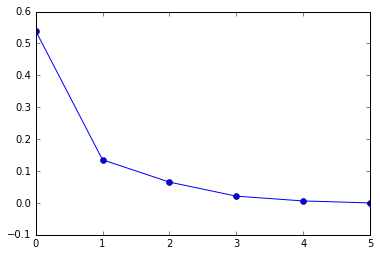

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_
print pd.DataFrame(pca.components_, columns=data.columns)
x = np.arange(6)
plt.plot(x, 1 - np.cumsum(pca.explained_variance_ratio_), '-o')

**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: The variance drops off rapidly after the first 2. I would choose 2 dimensions for PCA on this dataset.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: The first PCA component seems to coorelate with Fresh and the second PCA component seems to correlate with Grocery, milk and Detergents_Paper. The two major PCA components can be used to group customers more easily by observing their spending habits in these two categories.

###ICA

[[  3.97599355e-06  -8.59886636e-07  -6.28711730e-07  -6.77060709e-07
    2.07067530e-06  -1.04098223e-06]
 [ -2.10115505e-07   1.88251426e-06  -6.45028663e-06  -4.08141212e-07
    8.61829574e-07   1.46521187e-06]
 [ -1.53807253e-07  -9.84447608e-06   5.81239885e-06   3.63403734e-07
   -3.32305393e-06   6.05623018e-06]
 [ -2.99003233e-07   2.31324193e-06   1.20452467e-05  -1.46364692e-06
   -2.82034564e-05  -5.73086477e-06]
 [ -8.65159287e-07  -1.40577395e-07   7.73992444e-07   1.11462064e-05
   -5.54399614e-07  -5.95213935e-06]
 [  3.86475758e-07   2.19541928e-07   6.00294516e-07   5.22080384e-07
   -5.09796428e-07  -1.80924000e-05]]
Axes(0.125,0.125;0.775x0.775)


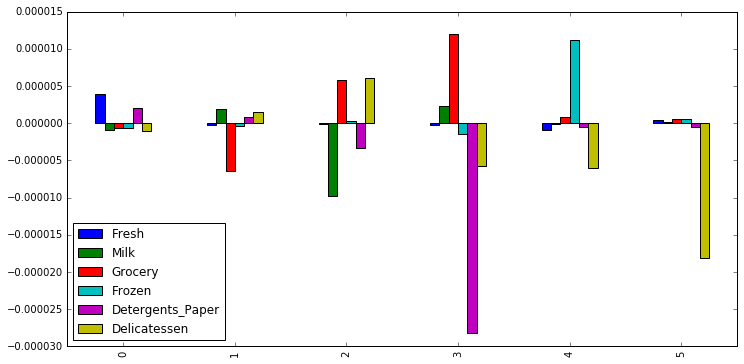

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components = data.shape[1], random_state = 10)
ica.fit_transform(data)

# Print the independent components
print ica.components_
print pd.DataFrame(ica.components_, columns=data.columns).plot(kind='bar', figsize=(12,6))

**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: Each vector in ICA decomposition represents a type of customer. The first vector represents a customer that mostly buys fresh, probably a farmer's market shopper. The second vector represents a customer that mostly buys grocery, probably a chain grocery store shopper. The third vector represents a customer that mostly buys milk, grocery and deli, probably a deli store shopper. The fourth vector represents a customer that mostly buys grocery and detergents probably a chain store shopper. The fifth vector represents a customer that mostly buys frozen, probably a supermarket shopper. The sixth vector represents a customer that mostly buys Deli, probably a deli store shopper. These components can be used to group shoppers into different categories.

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: In K-Means clustering we can pick the number of clusters we want and the algorithm will create exactly that many clusters. So each feature is assigned to exactly one cluster. But in Gaussian Mixture Model, each feature is assigned to one or many clusters with a certain probility. K Means clustering could be thought of as special case of Gaussian Mixed Model clustering, where the probability of a feature being in K clusters is 1 for a particular cluster and 0 for others. GMM is more complex and tends to be slower than K-Means algorithm, because it maintains partial membership information for each data point and it needs to update the estimate for covariance matrix on each iteration. GMM generally tends to be more accurate compared to K-Means algorithm except when K is very high and the feature distribution is non-gaussian. Both K-Means and GMM work well with large number of samples, producing many clusters. K-Meas is useful when smaller number of clusters with even cluster size is preferred, where as GMM is preferred when density estimation is important. In the current dataset since there are two major PCA dimensions, we can expect a good cluster distribution for 2 clusters and since shoppers are chosen at random, gaussian distribution can be assumed or achieved with a transformation like log transformation. This makes the dataset ideal for K-Means clustering.

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [5]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [6]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'

clusters2 = KMeans(init='k-means++', n_clusters=2, n_init=10)
clusters3 = KMeans(init='k-means++', n_clusters=3, n_init=10)
clusters2.fit(reduced_data)
clusters3.fit(reduced_data)
print clusters2
print clusters3

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=2, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)
KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)


In [7]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z2 = clusters2.predict(np.c_[xx.ravel(), yy.ravel()])
Z3 = clusters3.predict(np.c_[xx.ravel(), yy.ravel()])

Centeroids for K-Means with 2 clusters
[[-24088.33276689   1218.17938291]
 [  4175.31101293   -211.15109304]]
Inverse Transform for K-Means with 2 clusters
Axes(0.125,0.125;0.775x0.775)
Centeroids for K-Means with 3 clusters
[[  1341.31124554  25261.39189714]
 [-23978.86566553  -4445.56611772]
 [  4165.1217824   -3105.15811456]]
Inverse Transform for K-Means with 3 clusters
Axes(0.125,0.125;0.775x0.775)


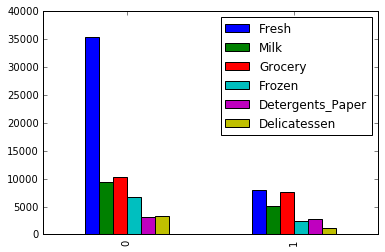

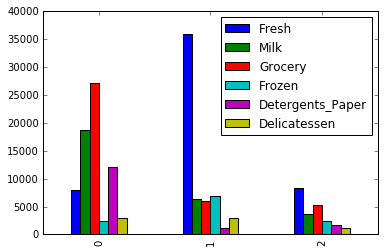

In [8]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 
centroids2 = clusters2.cluster_centers_
centroids3 = clusters3.cluster_centers_
print "Centeroids for K-Means with 2 clusters"
print centroids2
print "Inverse Transform for K-Means with 2 clusters"
print pd.DataFrame(pca.inverse_transform(centroids2), columns=data.columns).plot(kind='bar')
print "Centeroids for K-Means with 3 clusters"
print centroids3
print "Inverse Transform for K-Means with 3 clusters"
print pd.DataFrame(pca.inverse_transform(centroids3), columns=data.columns).plot(kind='bar')

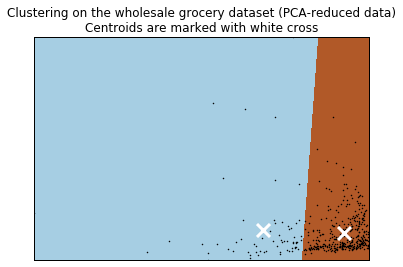

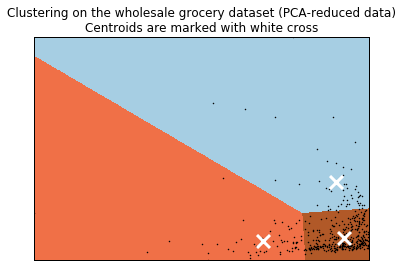

In [10]:
# Put the result into a color plot
Z2 = Z2.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z2, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids2[:, 0], centroids2[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Z3 = Z3.reshape(xx.shape)
plt.figure(2)
plt.clf()
plt.imshow(Z3, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids3[:, 0], centroids3[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**7)** What are the central objects in each cluster? Describe them as customers.

Answer: The central objects in each cluster represent a type of customer. In K-Means cluster with 2 clusters, the first cenroid represents a customer that mostly buys fresh, milk and grocery, possibly a chain grocery store shopper. The second centroid represents a customer that mostly buys fresh, possibly a farmer's market shopper. In K-Means cluster with 3 clusters, the first centroid represents a customer that mostly buys fresh, possibly a farmer's market shopper. The second centroid represents a customer that mostly buys grocery, possibly a chain grocery store shopper. The third centroid represents a customer that buys fresh, milk and grocery, possibly a small grocery store shopper.

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: K-Means clustering helped divide the customers into 2 major groups. The dataset had quantity of items purchased for fresh, milk, grocery, frozen and deli. Using K-Means clustering with 2 clusters, we were able to divide the customers into two broad categories, farmer's market shopper and grocery store shopper. We could have used Gaussian Mixture Model to improve accuracy of clustering. But GMM is more complex and requires more computing resource. Since using PCA, we were able to find out that there are two major dimensions referring to two main types of customers, we were able to decide on using K-Means clustering with only 2 clusters. For such a small number of clusters, the complexity and overhead of GMM is unnecessary.

**9)** How would you use that technique to help the company design new experiments?

Answer: Since K-Means clustering helped identify the 2 major types of customers, I would use this information to design experiments for the company where 2 different stores could be arranged differently, with one having a mix of fresh, milk and grocery at the front and frozen, detergents and deli at the back and the other having just fresh at the front and milk, grocery, detergents and deli at the back. The results of the experiment would help suggest the most optimal way to arrange items at stores to generate most revenue. Also this will help decide what type of items should be sold more to what type of stores.

**10)** How would you use that data to help you predict future customer needs?

Answer: Knowing different types of customers and their spending habbits, I would use linear regression to predict their future demand for specific types of items. Using K-Means clustering on the given dataset we know that there are mainly 2 types of customers, farmer's market shoppers and grocery store shoppers. We can measure how many fresh, milk, grocery, detergents and deli is bought by each type of customers over a period of time say 1 year and then the quantity of each type of items bought by each different types of customers can be used as features in linear regression to predict items needed to be produced for next year. 